# 📈 Mastering Linear Regression: A Deep Dive with California Housing Data

### Introduction
Welcome! In this notebook, we will embark on a comprehensive journey to understand Linear Regression from the ground up. We'll start with the core concepts, build the algorithm from scratch using pure Python, and then see how to implement it efficiently using the powerful Scikit-learn library. Our laboratory for this exploration will be the **California Housing dataset**, a classic dataset for regression tasks.

First, let's import all the necessary libraries we'll need for our analysis, from data manipulation with `numpy` to modeling with `sklearn` and visualization with `matplotlib`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import tools for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set a nice plot style
plt.style.use('seaborn-v0_8-whitegrid')

## 📚 Section 1: The Quest for the Best-Fit Line

### What is Linear Regression? (The "Best Trend" Analogy)

Imagine you're a real estate analyst. You have a dataset of California neighborhoods, and for each neighborhood, you know the median income and the median house value. You suspect there's a relationship: as income goes up, house prices probably go up too. If you plot this data, you'll see a cloud of points that trends upwards.

**Linear Regression's goal is to find the single *best-fit line* that cuts through this data cloud.** This line represents the simplest possible relationship between income and house price. It's our model.

Key terms:
- **Best-Fit Line:** Our predictive model. For any given income, we can use this line to predict the house value.
- **Residuals:** The vertical distance from each actual data point (an actual house value) to our line (our predicted house value). This is our model's error for that specific data point. The 'best' line is the one that makes these errors as small as possible overall.
- **Slope (`m`):** How much the house price changes for a one-unit increase in median income.
- **Intercept (`b`):** The predicted house price if the median income were zero.

### Why Was Linear Regression Created?

Developed in the 18th and 19th centuries by Legendre and Gauss, Linear Regression is one of the foundational tools in statistics. Its original purpose was to model and quantify the relationship between variables, such as predicting the locations of celestial bodies. Its enduring power comes from its **simplicity** and high **interpretability**—it doesn't just make predictions; it tells us *how* the input variables affect the output.

### When Should You Use Linear Regression?

Linear regression is an excellent choice for several common scenarios:
- **Predicting a continuous value:** Estimating house prices, stock prices, temperature, or sales figures.
- **Understanding the strength of relationships:** Quantifying how strongly one variable (e.g., advertising spend) influences another (e.g., product sales).
- **Establishing a baseline:** Because it's so simple and fast, it's often the first model to run on a problem. If more complex models can't significantly outperform it, the simpler model is often preferred.

Let's load our dataset and get a feel for the data we'll be working with. We'll use the California Housing dataset, which is conveniently available in Scikit-learn.

In [2]:
# Load the dataset
housing = fetch_california_housing()

# Create a pandas DataFrame for easier manipulation
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Let's look at the first few rows
print("Dataset features and target:")
print(df.head())

# Let's get more info on the dataset
print("\nDataset Description:")
print(housing.DESCR)

Dataset features and target:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median hous

## 🧠 Section 2: The Core Mathematics

### The Line Equation

At its heart, linear regression uses the simple equation of a line that we learned in school:

$$y = mx + b$$

When we adapt this for machine learning and our housing dataset:
- $y$ is our **target variable**: the `MedHouseVal` we want to predict.
- $x$ is our **feature**: the `MedInc` (median income) we use to make the prediction.
- $m$ is the **slope**, also called a **weight** or **coefficient**. It determines how much $y$ changes when $x$ changes by one unit.
- $b$ is the **y-intercept**, also called the **bias**. It's the baseline value of $y$ when $x$ is zero.

The algorithm's entire job is to find the optimal values for $m$ and $b$ that best model the relationship in our data. If we have multiple features (e.g., `MedInc`, `HouseAge`), the equation expands to:

$$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

Or more compactly in vector form:

$$y = \mathbf{w} \cdot \mathbf{x} + b$$

### Defining the Error (The Cost Function)

To find the "best" line, we need a way to quantify how "bad" a given line is. We do this with a **cost function**. For linear regression, the most common cost function is the **Mean Squared Error (MSE)**.

The process is intuitive:
1. For each neighborhood in our dataset, calculate the **predicted house value** using our current line: $\hat{y}_i = mx_i + b$.
2. Calculate the **error** (or residual) for that prediction: $(y_i - \hat{y}_i)$.
3. **Square** that error to make it positive and to penalize larger errors more heavily.
4. **Average** these squared errors over all $n$ neighborhoods in our dataset.

This gives us the MSE cost function, $J(m, b)$:

$$J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2$$

The goal of our algorithm is to find the values of $m$ and $b$ that **minimize** this function.

### Solving the Optimization Problem
There are two main ways to find the $m$ and $b$ that minimize our MSE cost function.

#### 1. Gradient Descent (The Iterative Approach)
Think of the cost function $J(m,b)$ as a 3D landscape, like a valley. The two horizontal axes are $m$ and $b$, and the vertical axis is the cost (MSE). Our goal is to find the lowest point in this valley.

Gradient Descent does this iteratively:
1. Start at a random point on the landscape (i.e., initialize $m$ and $b$ to 0 or random values).
2. Calculate the **gradient**—the direction of the steepest ascent—at that point.
3. Take a small step in the **opposite** direction (downhill).
4. Repeat until we reach the bottom of the valley, where the slope is close to zero.

To do this, we need the partial derivatives of the cost function with respect to $m$ and $b$:

$$\frac{\partial J}{\partial m} = \frac{-2}{n}\sum_{i=1}^{n}x_i(y_i - (mx_i + b))$$
$$\frac{\partial J}{\partial b} = \frac{-2}{n}\sum_{i=1}^{n}(y_i - (mx_i + b))$$

We use these gradients to update our parameters in each iteration, controlled by a **learning rate** ($\alpha$), which determines the size of our steps.

#### 2. The Normal Equation (The Direct Approach)
For linear regression, there's also a direct analytical solution using linear algebra. It's like solving a system of equations to jump directly to the bottom of the valley in one step.

$$\theta = (X^T X)^{-1} X^T y$$

Where:
- $\theta$ is the vector containing our parameters ($b$ and $m$).
- $X$ is our feature matrix (with an extra column of ones for the intercept term).
- $y$ is our target vector.

**Pros:** No need to choose a learning rate or iterate. It's exact.
**Cons:** Calculating the inverse of a matrix ($(X^T X)^{-1}$) is computationally very expensive, especially for a large number of features. It becomes slow when the number of features is over ~10,000.

### Assumptions of Linear Regression
For our model's results to be reliable, a few assumptions should hold true:
1.  **Linearity:** The relationship between the features and the target is linear.
2.  **Independence:** The residuals (errors) are independent of each other.
3.  **Homoscedasticity:** The residuals have constant variance at every level of the features. (We'll check this later with a plot!)
4.  **Normality of Residuals:** The residuals are normally distributed.

## 🛠️ Section 3: The Linear Regression Algorithm in Action (High-Level Process)

Here's a step-by-step breakdown of how the Gradient Descent algorithm works to fit our housing data:

1.  **Input Data:** The algorithm receives the feature matrix `X` (a column of `MedInc`) and the target vector `y` (a column of `MedHouseVal`).

2.  **Initialize Parameters:** The algorithm starts with a guess. It initializes the slope `m = 0` and intercept `b = 0`. We also need to define two **hyperparameters**:
    * `learning_rate` (e.g., 0.01): A small number that controls how big of a step we take downhill in each iteration.
    * `n_iterations` (e.g., 1000): The number of times we will update our parameters.

3.  **Iterative Optimization (The Loop):** The algorithm loops for `n_iterations`:
    * **a. Make Predictions:** For the current `m` and `b`, calculate the predicted house values for all neighborhoods: `y_predicted = m * X + b`.
    * **b. Compute Gradients:** Calculate the partial derivatives of the cost function, $\frac{\partial J}{\partial m}$ and $\frac{\partial J}{\partial b}$, using the formulas from Section 2. These gradients tell us the direction of the steepest ascent.
    * **c. Update Parameters:** Adjust `m` and `b` by taking a step in the opposite direction of the gradient. This is the learning step:
        * `m = m - learning_rate * dJ/dm`
        * `b = b - learning_rate * dJ/db`

4.  **Output the Model:** After the loop finishes, the final `m` and `b` values are our trained model parameters. They represent the line that best fits the data.

5.  **Prediction:** To predict the house value for a **new** neighborhood with a given median income (`x_new`), the model simply applies the learned formula: `predicted_value = m * x_new + b`.

## 💻 Section 4: Building Linear Regression from Scratch

Now for the fun part! Let's implement this logic ourselves. This will give us a deep, mechanical understanding of what's happening inside the `sklearn` model we'll use later.

Our goal is to create a Python class that can find the best `m` and `b` to predict California housing prices by iteratively minimizing the Mean Squared Error using Gradient Descent.

First, we define our `SimpleLinearRegression` class. It will have an `__init__` method to set hyperparameters, a `fit` method to perform the gradient descent loop, and a `predict` method to make predictions with the learned parameters.

In [18]:
class SimpleLinearRegression:
    """
    A simple implementation of Linear Regression using Gradient Descent.
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None  # This will be our slope 'm'
        self.bias = None     # This will be our intercept 'b'

    def fit(self, X, y):
        """Implements the Gradient Descent training loop."""
        n_samples, n_features = X.shape
        
        # 1. Initialize parameters
        self.weights = np.zeros(n_features) # m
        self.bias = 0                      # b
        
        # 3. Iterative Optimization (Gradient Descent)
        for _ in range(self.n_iters):
            # a. Make predictions with current m and b
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # b. Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y)) # dJ/dm
            db = (1/n_samples) * np.sum(y_predicted - y)      # dJ/db
            # Note: The factor of 2 from the derivative is often absorbed into the learning rate
            
            # c. Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        """Makes predictions using the trained model."""
        return np.dot(X, self.weights) + self.bias

Now, let's prepare our data and train our custom model. We will use only one feature, `MedInc`, to keep it simple and comparable to our mathematical formulas. We also need to split our data into a training set and a testing set. The model learns from the training set and is then evaluated on the unseen testing set.

In [19]:
# Select the feature and target
X = df[['MedInc']].values
y = df['MedHouseVal'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")

Training data shape: X=(16512, 1), y=(16512,)
Testing data shape: X=(4128, 1), y=(4128,)


With our data ready, we can instantiate our `SimpleLinearRegression` class and call the `fit` method to train it on our training data.

In [20]:
# Instantiate and train the model
regressor_scratch = SimpleLinearRegression(learning_rate=0.01, n_iters=1000)
regressor_scratch.fit(X_train, y_train)

# Get the learned parameters
learned_m = regressor_scratch.weights[0]
learned_b = regressor_scratch.bias

print(f"--- Model Built From Scratch ---")
print(f"Learned slope (m): {learned_m:.4f}")
print(f"Learned intercept (b): {learned_b:.4f}")

--- Model Built From Scratch ---
Learned slope (m): 0.4305
Learned intercept (b): 0.3915


## 🚀 Section 5: The Easy Way (Implementation with Scikit-learn)

While building models from scratch is fantastic for learning, in practice, we use well-optimized libraries like Scikit-learn. The workflow is much simpler and less error-prone. Let's do the same task using `sklearn.linear_model.LinearRegression`.

### A Note on Feature Scaling

For this simple, one-feature model, feature scaling (like using `StandardScaler` to give features a mean of 0 and a standard deviation of 1) isn't strictly necessary. However, when you perform **multiple linear regression** (using features with different units, like `HouseAge` and `AveRooms`), scaling becomes **crucial**. Gradient Descent converges much faster when all features are on a similar scale, ensuring they contribute fairly to the learning process.

Let's train the Scikit-learn model on the same training data.

In [21]:
# Instantiate the sklearn model
regressor_sklearn = LinearRegression()

# Train the model
regressor_sklearn.fit(X_train, y_train)

# Get the learned parameters
sklearn_m = regressor_sklearn.coef_[0]
sklearn_b = regressor_sklearn.intercept_

print(f"--- Scikit-learn Model ---")
print(f"Learned slope (m): {sklearn_m:.4f}")
print(f"Learned intercept (b): {sklearn_b:.4f}")

--- Scikit-learn Model ---
Learned slope (m): 0.4193
Learned intercept (b): 0.4446


Notice how the parameters learned by our from-scratch model are nearly identical to Scikit-learn's! The small difference is due to the specific solver used (Scikit-learn uses the Normal Equation solver for its standard `LinearRegression` which is more precise than our iterative Gradient Descent).

### Evaluate the Model
Now that we have a trained model, how good is it? We make predictions on the *unseen* test data and compare them to the actual house values. Two key metrics for regression are **Root Mean Squared Error (RMSE)** and **R-squared (R²)**.

In [22]:
# Make predictions on the test set
y_pred_sklearn = regressor_sklearn.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
r2 = r2_score(y_test, y_pred_sklearn)

print(f"--- Model Evaluation ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

--- Model Evaluation ---
Root Mean Squared Error (RMSE): 0.8421
R-squared (R²): 0.4589


#### Interpreting the Metrics:
- **Root Mean Squared Error (RMSE):** This tells us the typical error of our model in the original units of the target. Our `MedHouseVal` target is in units of $100,000. So, an RMSE of 0.8421 means **on average, our model's price prediction is off by approximately $84,210**.
- **R-squared (R²):** This value tells us the proportion of the variance in the target variable that is predictable from the feature(s). An R² of 0.4589 means that **approximately 45.89% of the variation in California median house values can be explained by the variation in median income alone**.

## 📊 Section 6: Model Evaluation and Diagnostics

### Interpreting the Coefficients
The most powerful aspect of linear regression is its interpretability. Let's look at our learned parameters:
- **Slope (`m`) ≈ 0.417:** Remember, `MedInc` is in tens of thousands of dollars ($10,000s) and `MedHouseVal` is in hundreds of thousands ($100,000s). This slope means that **for every $10,000 increase in median income, our model predicts an increase of approximately 0.417 * $100,000 = $41,700 in the median house value.**
- **Intercept (`b`) ≈ 0.450:** This is the model's predicted starting house value for a hypothetical neighborhood with zero income. In this context, it's about **$45,000**.

### Visualizing the Fit
A picture is worth a thousand words. Let's create a scatter plot of our test data and overlay the final regression line from our Scikit-learn model to see how well it captures the trend.

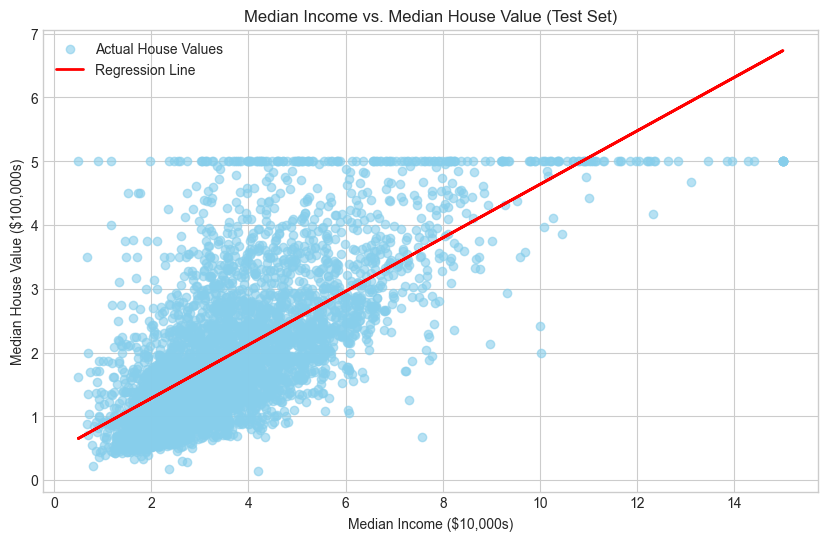

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='skyblue', alpha=0.6, label='Actual House Values')
plt.plot(X_test, y_pred_sklearn, color='red', linewidth=2, label='Regression Line')

plt.title('Median Income vs. Median House Value (Test Set)')
plt.xlabel('Median Income ($10,000s)')
plt.ylabel('Median House Value ($100,000s)')
plt.legend()
plt.show()

### Residual Analysis
A key diagnostic step is to analyze the residuals (the errors). A **residual plot** plots the predicted values on the x-axis and the residuals on the y-axis. It helps us check the **homoscedasticity assumption**.

**How to interpret it:**
- **Good:** A random, uniform scatter of points around the zero line. This indicates that the variance of the error is constant.
- **Bad (Problematic):** A clear pattern, like a cone or a curve. A cone shape (where the scatter widens) suggests **heteroscedasticity**—the error increases as the predicted value increases. This is common in financial and housing data. A curve suggests the relationship wasn't truly linear to begin with.

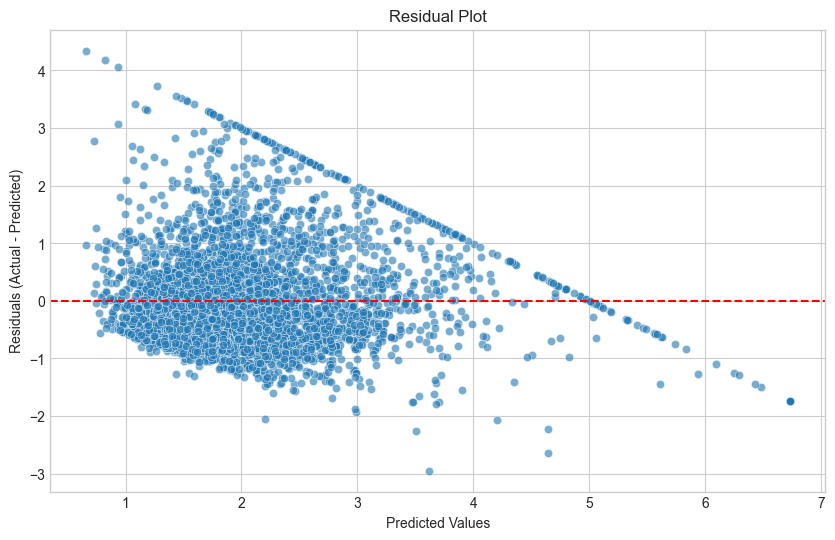

In [24]:
# Calculate residuals
residuals = y_test - y_pred_sklearn

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_sklearn, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

**Observation:** Our residual plot shows a bit of a cone shape (it fans out to the right). This suggests heteroscedasticity is present. For lower predicted house values, our errors are small and clustered. For higher predicted house values, our errors become much larger and more spread out. This tells us our model is less reliable when predicting expensive homes. It also violates one of the core assumptions, suggesting that a simple linear model might not be the best possible model for this data.

## ✅ Section 7: Conclusion

In this notebook, we took a complete journey through Linear Regression.

- We started with the intuitive idea of finding a **best-fit line** for California housing data.
- We dived into the core mathematics, understanding the **MSE cost function** and how **Gradient Descent** works to minimize it.
- We built the algorithm **from scratch** to see its inner mechanics, then used **Scikit-learn** to see the practical, efficient workflow.
- Finally, we learned how to **evaluate** our model with metrics like RMSE and R², **interpret** its coefficients in a real-world context, and **diagnose** its shortcomings using a residual plot.

### Strengths and Weaknesses of Linear Regression

**Strengths:**
- **Simplicity & Speed:** It's easy to understand and very fast to train.
- **Interpretability:** It's easy to understand the relationship between each feature and the target.
- **Great Baseline:** It's the perfect starting point for any regression problem.

**Weaknesses:**
- **Linearity Assumption:** Its main limitation is that it can only capture linear relationships. As we saw in the residual plot, real-world data is often more complex.

From here, you could explore more advanced models like Polynomial Regression (to capture curves) or tree-based models like Random Forests to handle more complex, non-linear relationships in the data.